<b><center><h3>Author : Nilay Kushawaha</h3></center></b>
<center><u><h3>Task 4: Exploratory Data Analysis - Global Terrorism</h3></u></center>
<h3>Objectives : </h3>   


*   Create Storyboard with the given dataset.
*   Analysize the data using graphs and figures.


<font color='green'><center><h3>GRIP @ THE SPARKS FOUNDATION</h3></center></font>
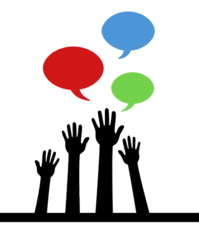


In [ ]:
## Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Reading the CSV file

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Global terrorism data/gbterrorism.csv')
df_backup=df.copy()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
##Checking the dataframe
# The dataset contains data from 1970 to 2017

df.head(5)

,iyear,imonth,iday,country,country_txt,region,region_txt,city,specificity,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,gname,individual,weaptype1,weaptype1_txt,property,ishostkid,public_kills
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,1.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,MANO-D,0,13,Unknown,0,0.0,1.0
1,1970,0,0,130,Mexico,1,North America,Mexico city,1.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),23rd of September Communist League,0,13,Unknown,0,1.0,0.0
2,1970,1,0,160,Philippines,5,Southeast Asia,Unknown,4.0,0.0,1,0,1,Assassination,10,Journalists & Media,Unknown,0,13,Unknown,0,0.0,1.0
3,1970,1,0,78,Greece,8,Western Europe,Athens,1.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),Unknown,0,6,Explosives,1,0.0,NaN
4,1970,1,0,101,Japan,4,East Asia,Fukouka,1.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),Unknown,0,8,Incendiary,1,0.0,NaN


In [ ]:
#Checking the tail of the dataframe

df.tail(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181688,2.017120e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Houses were damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,2.017120e+11,2017,12,31,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,...,NaN,NaN,A thrown grenade was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,2.017120e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,1.0,0,NaN,12/31/2017: An explosive device was discovered...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,20,Unknown,NaN,NaN,Unknown,Unknown,...,NaN,NaN,An explosive device containing a detonating co...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [ ]:
# Checking the columns and shape of data

print(f'The columns are :- {df.columns.to_list()}')
print(f'The shape of the DataFrame is :- {df.shape}')

The columns are :- ['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', '

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


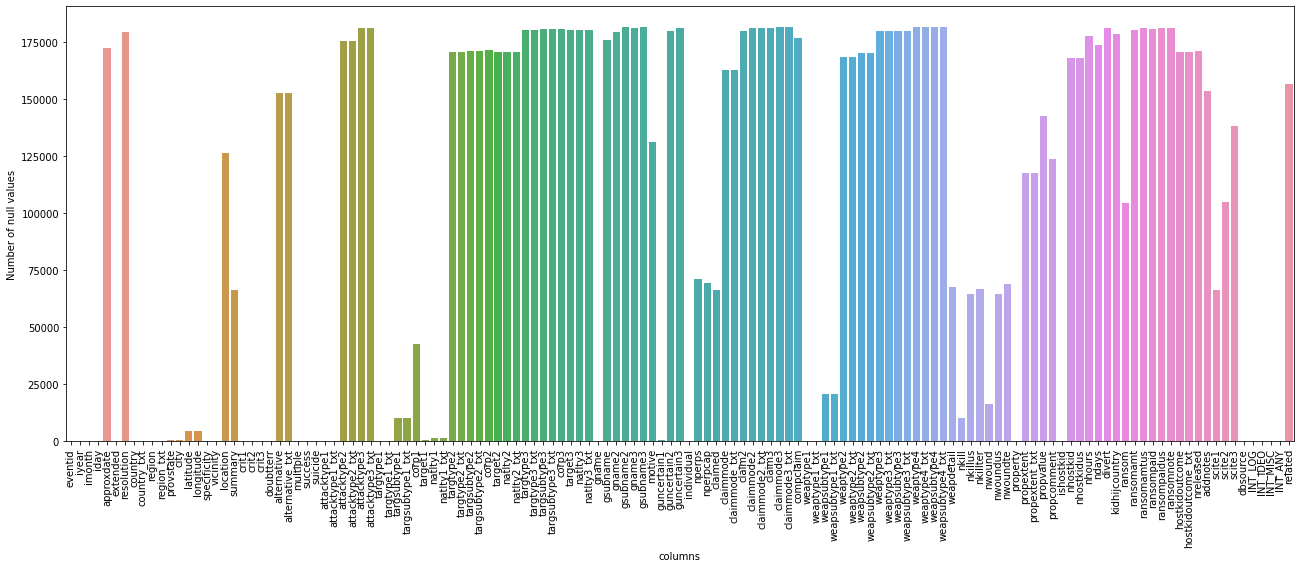

In [ ]:
#Checking the Null columns
#This graph shows that most of the columns have null values

y=df.isnull().sum()
x=df.columns
plt.figure(figsize=(22,8))
plt.xticks(rotation=90)
plt.xlabel('columns')
plt.ylabel('Number of null values')
sns.barplot(x,y)
plt.show()

**understanding the data**

In [ ]:
# df.iloc[:,0:50]

In [ ]:
# df.iloc[:,50:100]

In [ ]:
# df.iloc[:,100:]

**Handling Null values**

In [ ]:
df.drop(columns=['approxdate','resolution','attacktype2','attacktype2_txt','attacktype3','attacktype3_txt','weapsubtype4','weapsubtype4_txt','targtype2','targtype2_txt',
                 'targsubtype2','targsubtype2_txt'],inplace=True)

*The process of manually dropping all the null columns is very cumbersome,so we will write a for loop that will check if the number of null rows is greater than the particular thresold then it will drop that particular column*

In [ ]:
thresold=500
null_rows=df.isnull().sum()
column_name=df.columns
idx=0
for i in null_rows:
  if i>thresold:
    df.drop(columns=[column_name[idx]],inplace=True)
  idx+=1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


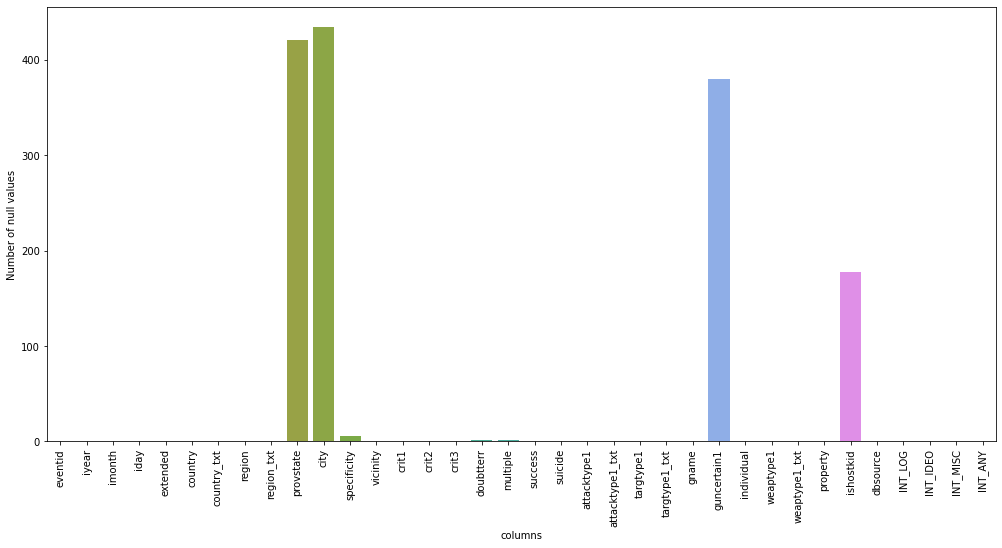

In [ ]:

# Again checking the null columns

y=df.isnull().sum()
x=df.columns
plt.figure(figsize=(17,8))
plt.xticks(rotation=90)
plt.xlabel('columns')
plt.ylabel('Number of null values')
sns.barplot(x,y)
plt.show()

In [ ]:
##Dropping some more unnecessary columns 

df.drop(columns=['provstate','eventid','extended','vicinity',
                 'crit1','crit2','crit3','guncertain1','dbsource','doubtterr','INT_LOG','INT_IDEO','INT_MISC','INT_ANY'],inplace=True)

In [ ]:
#Dropping remaning null values
df=df.dropna()
df['public_kills']=df_backup['nkill']
df['public_kills'].fillna(df['public_kills'].median())

0         1.0
1         0.0
2         1.0
3         0.0
4         0.0
         ... 
181686    1.0
181687    2.0
181688    0.0
181689    0.0
181690    0.0
Name: public_kills, Length: 181072, dtype: float64

In [ ]:
#The final cleaned Dataset 
print(f'The shape of final cleaned dataset is {df.shape}')

The shape of final cleaned dataset is (181072, 23)


**Visualizing the Data**

In [ ]:
df.head(3)

,iyear,imonth,iday,country,country_txt,region,region_txt,city,specificity,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,gname,individual,weaptype1,weaptype1_txt,property,ishostkid,public_kills
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,1.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,MANO-D,0,13,Unknown,0,0.0,1.0
1,1970,0,0,130,Mexico,1,North America,Mexico city,1.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),23rd of September Communist League,0,13,Unknown,0,1.0,0.0
2,1970,1,0,160,Philippines,5,Southeast Asia,Unknown,4.0,0.0,1,0,1,Assassination,10,Journalists & Media,Unknown,0,13,Unknown,0,0.0,1.0


Answering some Questions-

Q1. Which country is most affected by the terrorist attack?

Q2. Which city is most affected by the terrorist attack?

Q3. Year when most number of terrorist attack took place.

Q4. Which group is responsible for most of the attacks?

Q5.What is the most used attack type by the terrorists?

In [ ]:
#Q1

country_mst=df['country_txt'].value_counts().index[0]
print(f'The country with most number of terrorist attck is {country_mst}')

#Q2

city_mst=df['city'].value_counts().index[1]
print(f'The city with most number of terrorist attack is {city_mst}')

#Q3

year_mst=df['iyear'].value_counts().index[0]
print(f'The year with most number of terrorist attack is {year_mst}')

#Q4

group_mst=df['gname'].value_counts().index[1]
print(f'The terrorist group responsible for most number of attacks is {group_mst}')

#Q5

attack_mst=df['attacktype1_txt'].value_counts().index[0]
print(f'The most used attack type by terrorists is {attack_mst}')


The country with most number of terrorist attck is Iraq
The city with most number of terrorist attack is Baghdad
The year with most number of terrorist attack is 2014
The terrorist group responsible for most number of attacks is Taliban
The most used attack type by terrorists is Bombing/Explosion


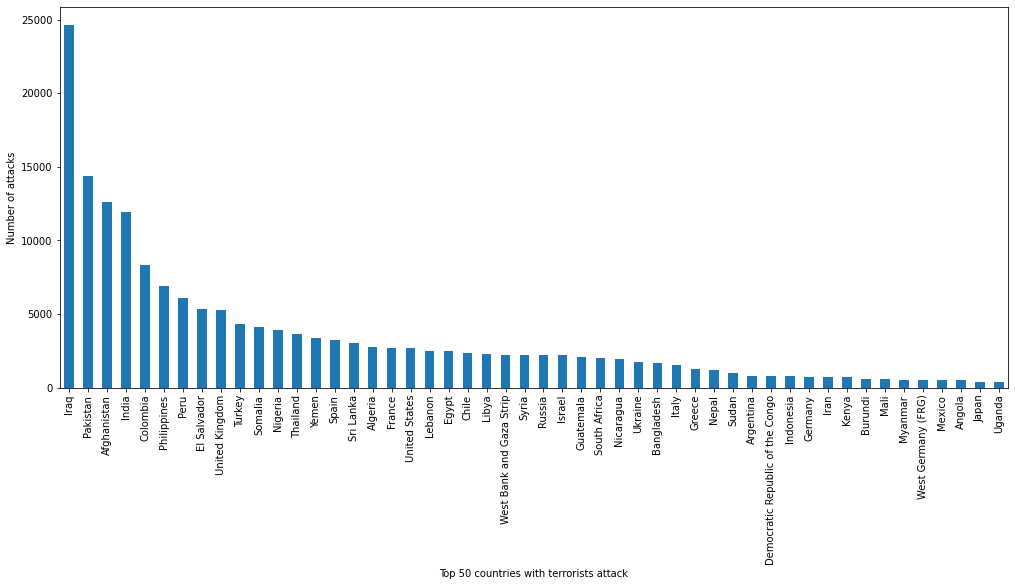

In [ ]:
#plotting Top 50 countries with most number of terrorists attacks

plt.figure(figsize=(17,7))
plt.xlabel('Top 50 countries affected by terrorists attack')
plt.ylabel('Number of attacks')
df['country_txt'].value_counts()[0:50].plot(kind='bar')
plt.show()

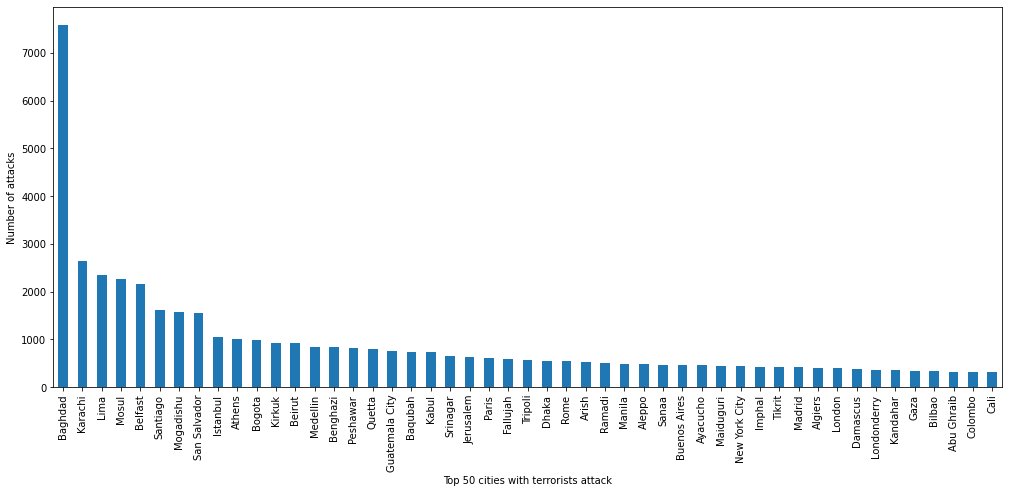

In [ ]:
#plotting Top 50 cities with most number of terrorists attacks

plt.figure(figsize=(17,7))
plt.xlabel('Top 50 cities affected by terrorists attack')
plt.ylabel('Number of attacks')
df['city'].value_counts()[1:50].plot(kind='bar')
plt.show()

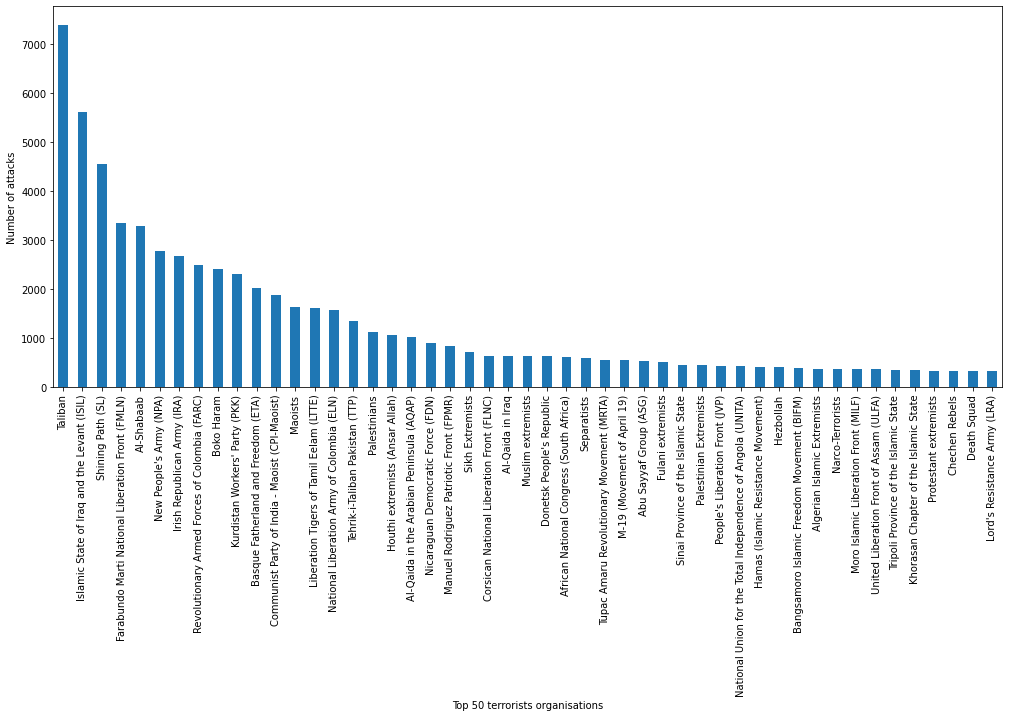

In [ ]:
#plotting Top 50 terrorist groups responsible for most attacks

plt.figure(figsize=(17,7))
plt.xlabel('Top 50 terrorists organisations')
plt.ylabel('Number of attacks')
df['gname'].value_counts()[1:50].plot(kind='bar')
plt.show()

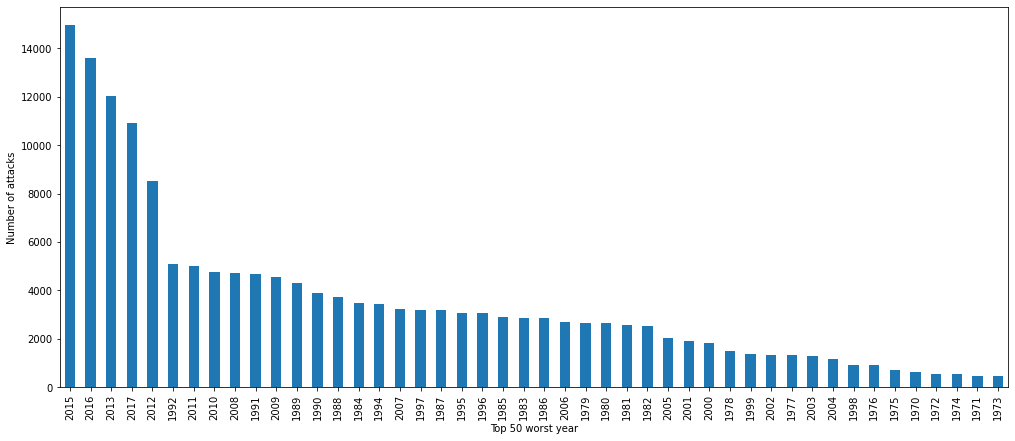

In [ ]:
#plotting Top 50 wrost year 

plt.figure(figsize=(17,7))
plt.xlabel('Top 50 worst year')
plt.ylabel('Number of attacks')
df['iyear'].value_counts()[1:50].plot(kind='bar')
plt.show()

Some more Questions

Q1. From which country most number of people were killed?

Q2. From which city most number of people were killed?

Q3. By which organisation most number of people were killed?



In [ ]:
#Q1

country_kills=df.groupby(df['country_txt'])['public_kills'].sum().sort_values(ascending=False).index[0]
print(f'The country in which most number of people were killed in terrorist attack is {country_kills}')

#Q2

city_kills=df.groupby(df['city'])['public_kills'].sum().sort_values(ascending=False).index[1]
print(f'The city in which most number of people were killed in terrorist attack is {city_kills}')

#Q3.

org_kills=df.groupby(df['gname'])['public_kills'].sum().sort_values(ascending=False).index[1]
print(f'The organisation responsible for killing most number of people is {org_kills}')


The country in which most number of people were killed in terrorist attack is Iraq
The city in which most number of people were killed in terrorist attack is Baghdad
The organisation responsible for killing most number of people is Islamic State of Iraq and the Levant (ISIL)


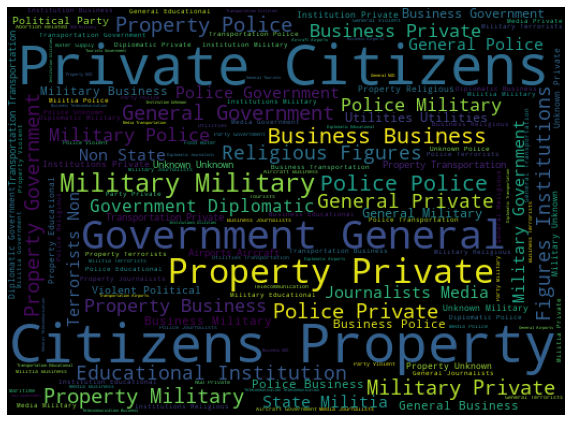

In [ ]:
#World cloud to display the type of people targeted by the terrorist groups

from wordcloud import WordCloud
cities = df['targtype1_txt']
plt.figure(figsize=(10,10))
wordcloud = WordCloud(background_color='black',width=520,height=380).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)

plt.show()

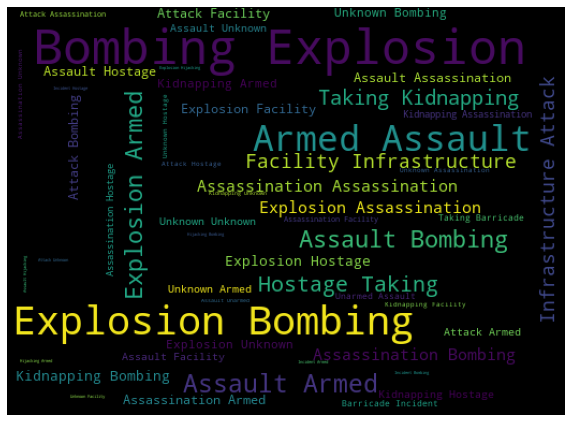

In [ ]:
#World cloud to display the attack type used by the terrorist groups

from wordcloud import WordCloud
cities = df['attacktype1_txt']
plt.figure(figsize=(10,10))
wordcloud = WordCloud(background_color='black',width=520,height=380).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)

plt.show()

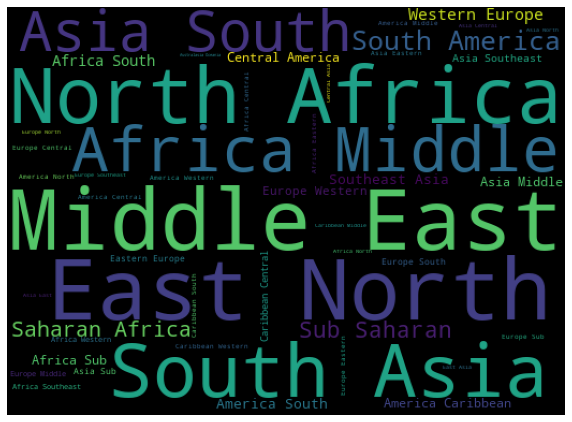

In [ ]:
#World cloud to display the regions worst affected by the terrorists attacks
from wordcloud import WordCloud
cities = df['region_txt']
plt.figure(figsize=(10,10))
wordcloud = WordCloud(background_color='black',width=520,height=380).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)

plt.show()



---



<center><h1>Thank You</h1></center>